In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean

Cut out the North Atlantic from 2023 NOAA OISSTv2.1 data

In [2]:
sst_2023 = xr.load_dataset("sst_data/sst.day.mean.2023.nc")
# convert longitudes from 0 to 360 degrees to -180 to 180
sst_2023.coords['lon'] = (sst_2023.coords['lon'] + 180) % 360 - 180
sst_2023 = sst_2023.sortby(sst_2023.lon)
gb = sst_2023.sst.groupby('time.month')
sst_2023 = sst_2023.sst.sel(lat=slice(0,70), lon=slice(-80,10))

Plot North Atlantic SSTs for Jan. 1st, 2023

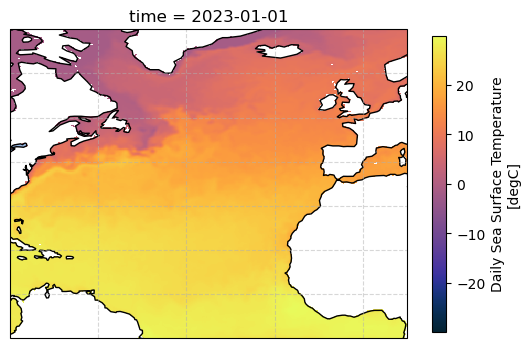

In [3]:
a_day = sst_2023.sel(time="2023-01-01")
fig1, ax1 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAKES, edgecolor='black')
gl = ax1.gridlines(alpha = 0.5, linestyle = "--")
a_day.plot(ax=ax1, cmap = cmocean.cm.thermal, transform = ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8})

Plot 2023 monthly mean SST for 45 N, 30 W

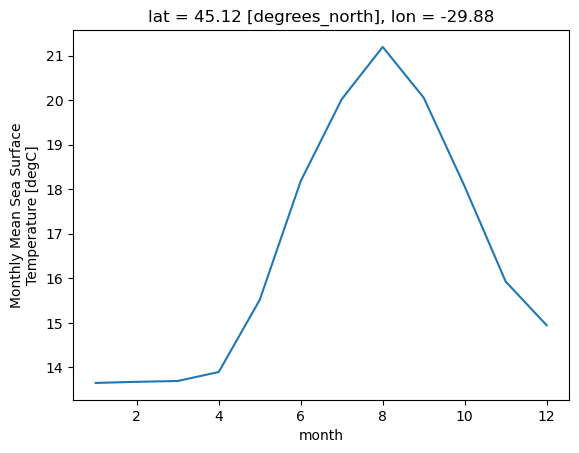

In [11]:
sst_mm = gb.mean(dim="time")
sst_mm.attrs["long_name"] = "Monthly Mean Sea Surface Temperature"
sst_mm_pt = sst_mm.sel(lat=45, lon=-30, method="nearest")
sst_mm_pt.plot()

Plot annual mean North Atlantic SSTs for 2023

Text(0.5, 1.0, '2023 Mean SSTs')

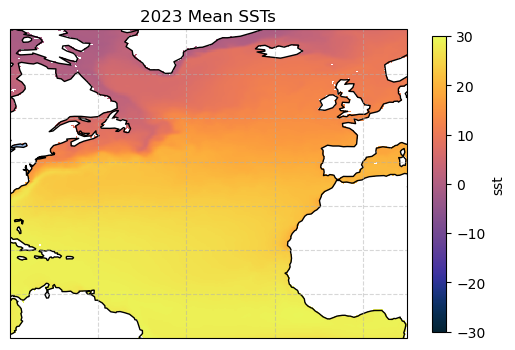

In [8]:
yr_avg = sst_2023.mean(dim="time")
fig2, ax2 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax2.coastlines()
ax2.add_feature(cartopy.feature.LAKES, edgecolor='black')
gl = ax2.gridlines(alpha = 0.5, linestyle = "--")
yr_avg.plot(ax=ax2, cmap = cmocean.cm.thermal, transform = ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8})
ax2.set_title("2023 Mean SSTs")